# Vehicle-coupon-recommendation Prediction

### "Predicting Coupon Redemption Using Machine Learning"

##### Objective:
This project aims to analyze customer behavior and predict whether a user will redeem a given coupon based on various factors such as demographics, travel preferences, and spending habits.



#### Feature Description:
Feature Names: Description destination-------Destination of the user (e.g., Home, Work, No Urgent Place) , passanger---------Number of passengers traveling with the user , weather -------- Current weather conditions (Sunny, Rainy, Snowy) ,temperature---------Temperature at the time of travel ,  time--------- Time of the day when the coupon was offered , coupon --------- Type of coupon offered (e.g., CoffeeHouse, Bar, Restaurant) ,  expiration ------- Expiration time of the coupon (2 hours, 1 day, etc.) , gender--------- Gender of the user  , age --------- Age group of the user , maritalStatus------- Marital status of the user (Single, Married, etc.) , has_children -------Whether the user has children (1 = Yes, 0 = No) , education -------- User’s education level , occupation ------- User’s occupation , income -------- User’s income category , car ---------- Type of car owned (if any),  Bar -------- Frequency of visiting bars (Never, Less than once a month, etc.) , CoffeeHouse -------- Frequency of visiting coffee houses ,  CarryAway --------- Frequency of ordering takeout food , RestaurantLessThan20 ------ Frequency of visiting restaurants with a bill < 20-$50 , toCoupon_GEQ5min ------- Whether the destination is at least 5 minutes away , toCoupon_GEQ15min------- Whether the destination is at least 15 minutes away , toCoupon_GEQ25min ----- Whether the destination is at least 25 minutes away ,  direction_same -------- Whether the user is traveling in the same direction as the coupon location , direction_opp ------- Whether the user is traveling in the opposite direction , Y (Target Variable)------- Whether the user accepted and used the coupon (1 = Yes, 0 = No)

In [647]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis,norm
import warnings
warnings.filterwarnings('ignore')

In [648]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [649]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [650]:
df.shape

(12684, 26)

In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [652]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [653]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [654]:
#isna.sum is used for identifying number of null values presnt in our dataset
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [655]:
#to find unique values from the column
df['Restaurant20To50'].unique()


array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [656]:
#to find unique values from the column
df['toCoupon_GEQ5min'].value_counts()


toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

In [657]:
#mode is used to find number of frequency of the data
df['Restaurant20To50'].mode()

0    less1
Name: Restaurant20To50, dtype: object

In [658]:
# List of columns to fill
columns_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Fill missing values with mode in each column
for col in columns_to_fill:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12684 non-null

In [660]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [661]:
#dop car and toCoupon_GEQ5min  column from the dataframe
df.drop(['car','toCoupon_GEQ5min'], axis=1,inplace=True)

In [662]:
#checking any duplicate rows
df.duplicated().sum()

74

In [663]:
#drop duplicate rows
df1 = df.drop_duplicates()
df1.shape

(12610, 24)

In [664]:
df1.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


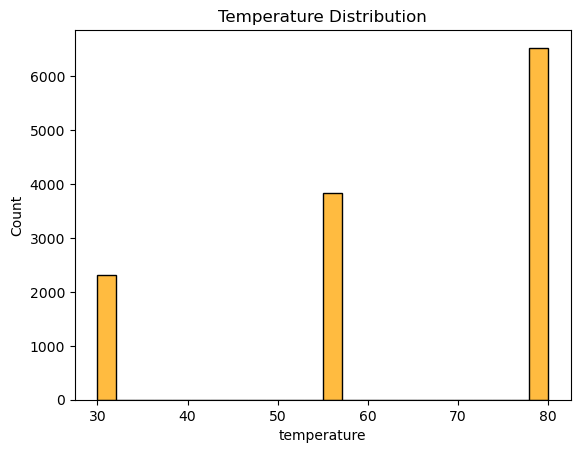

In [665]:
sns.histplot(df['temperature'],color="orange")
plt.title("Temperature Distribution")
plt.show()

In [666]:
df1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0


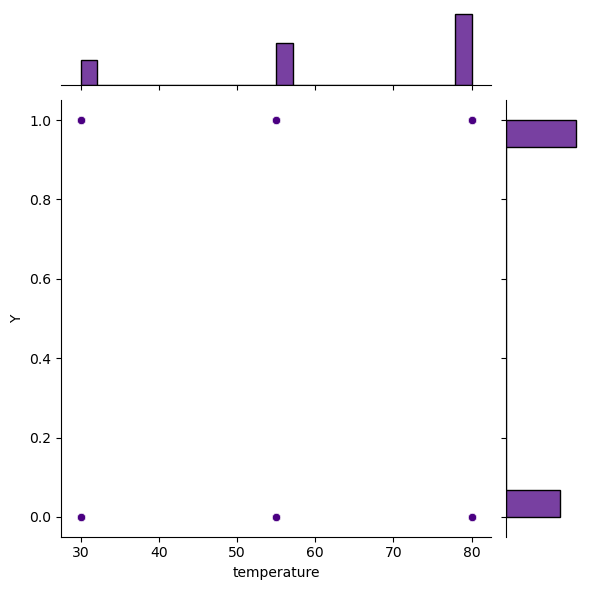

In [667]:
# Create a jointplot
sns.jointplot(x='temperature', y='Y', data=df1, kind='scatter',color= 'indigo')

plt.show()


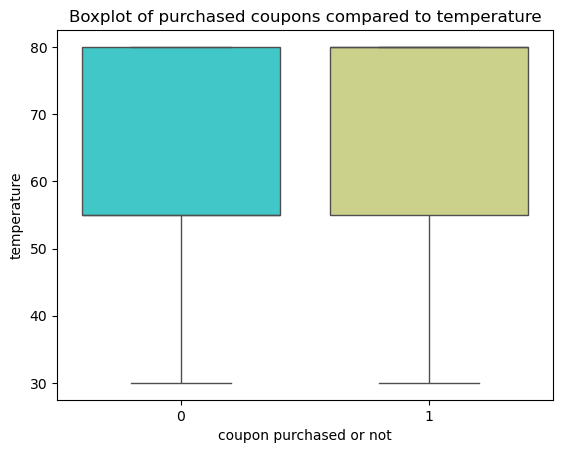

In [668]:
#checking outliers using the visualization 
sns.boxplot(x="Y",y='temperature',data=df1,palette="rainbow")
plt.title("Boxplot of purchased coupons compared to temperature")
plt.xlabel("coupon purchased or not")
plt.ylabel("temperature")
plt.show()

In [669]:
#by calculating outliers using IQR method
Q1 = df1['temperature'].quantile(0.25)
Q3 = df1['temperature'].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
print(f"Upper whisker limit: {upper_whisker}, Max value: {df1['temperature'].max()}")
lower_whisker = Q1 - 1.5 * IQR
print(f"lower whisker limit:{lower_whisker}, Min value: {df1['temperature'].min()}")

Upper whisker limit: 117.5, Max value: 80
lower whisker limit:17.5, Min value: 30


In [670]:
#checking outliers 
df1[(df1['temperature'] < lower_whisker) | (df1['temperature'] > upper_whisker)]


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


In [671]:
df1 = df1[(df['temperature'] >= lower_whisker) & (df1['temperature'] <= upper_whisker)]

In [672]:
df1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0


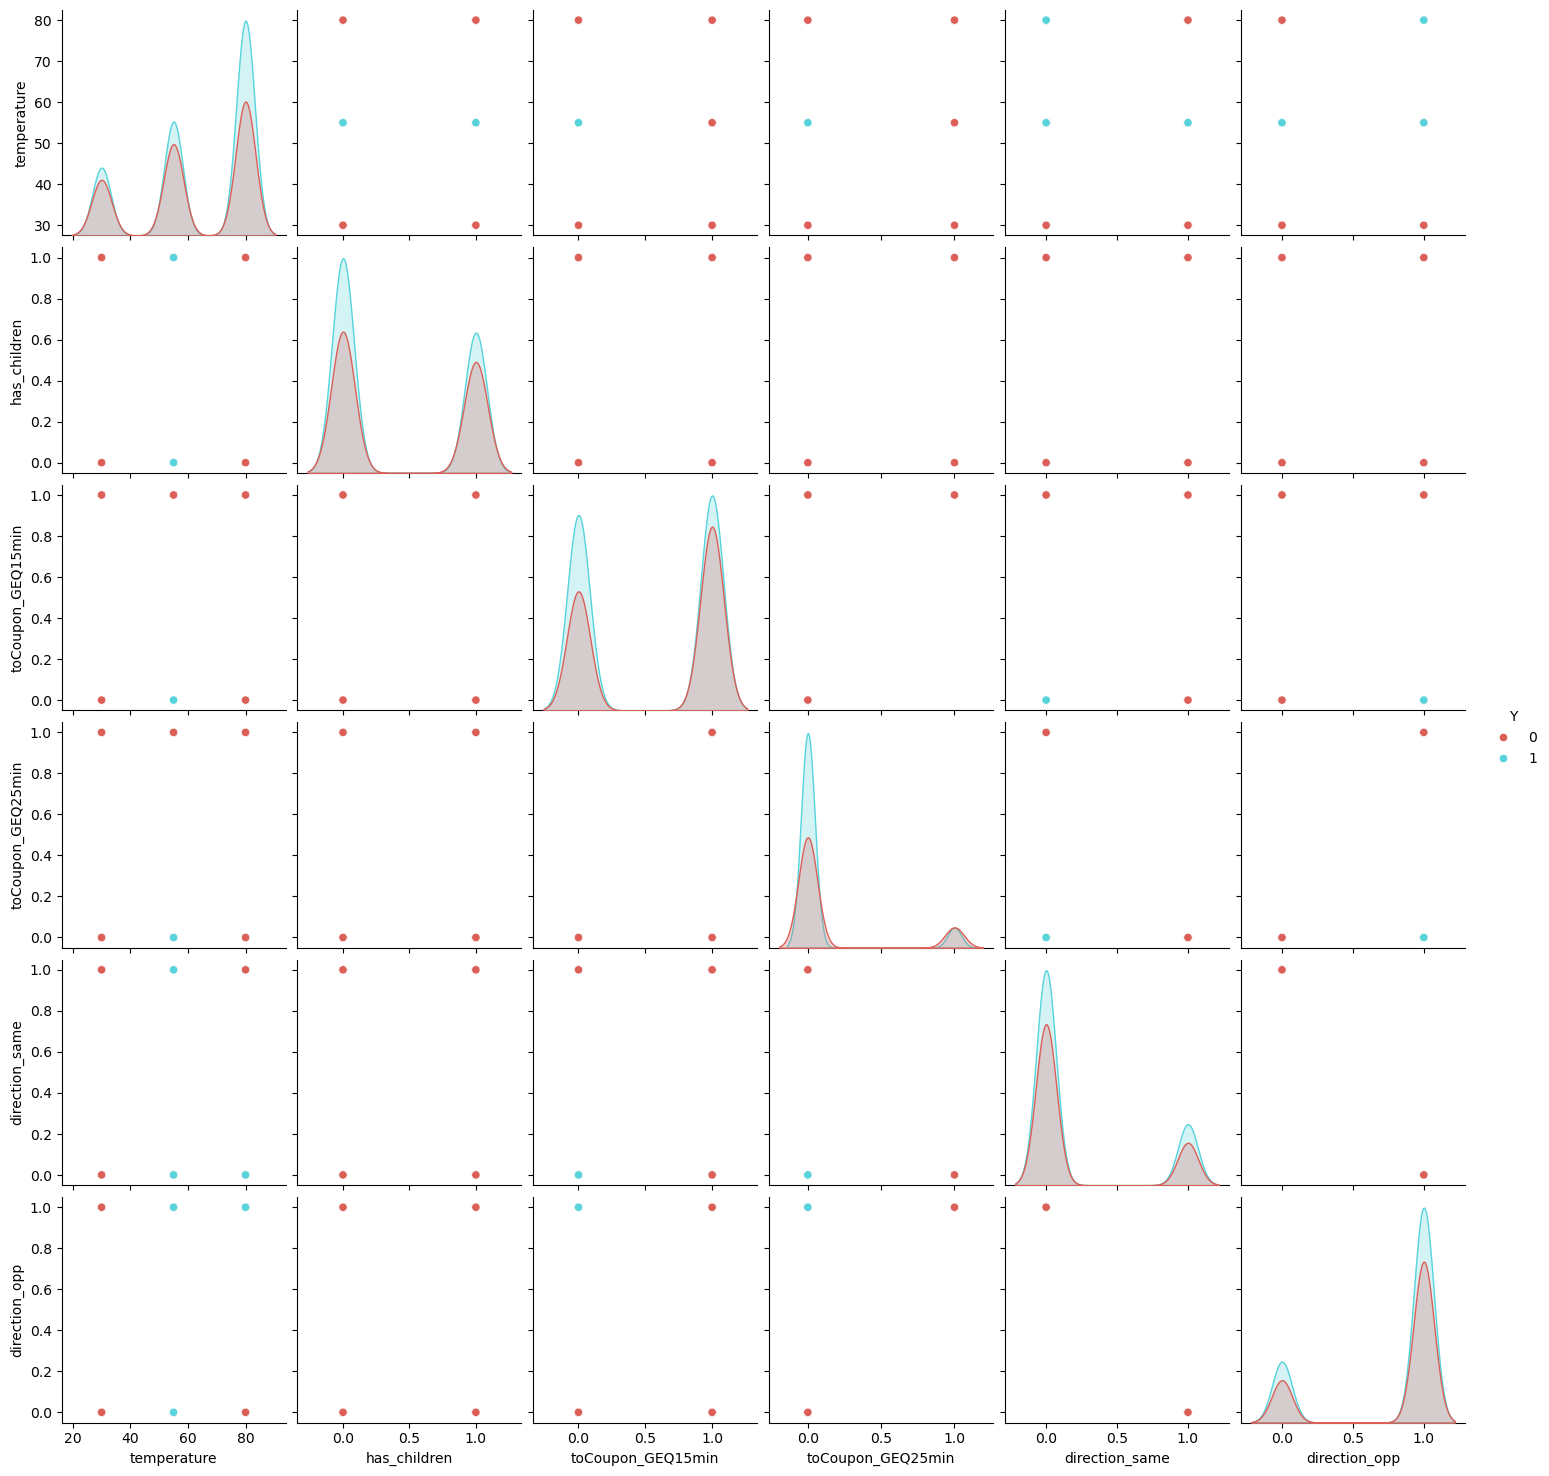

In [673]:
#pair plot for all numerical columns
sns.pairplot(df1, palette = 'hls',hue="Y")
#sns.color_palette
plt.show()

In [674]:
df1['Y'].value_counts()

Y
1    7157
0    5453
Name: count, dtype: int64

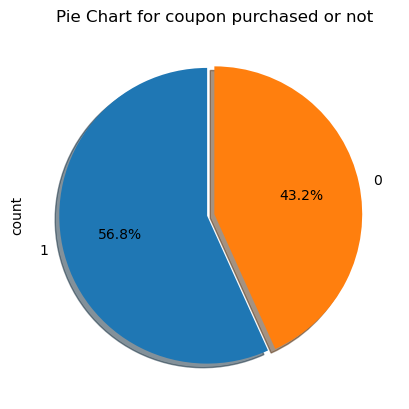

In [675]:

df1["Y"].value_counts().plot.pie(explode=[0.05,0],autopct='%1.1f%%', startangle=90,shadow=True)
plt.title("Pie Chart for coupon purchased or not")
plt.show()

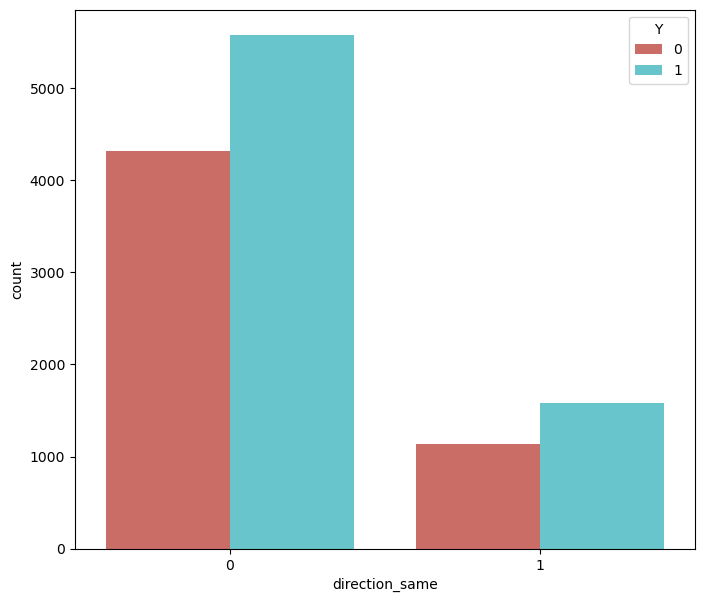

In [676]:

plt.figure(figsize=(8,7))
ax = sns.countplot(x='direction_same', hue="Y", data=df1,palette = "hls")
plt.show()

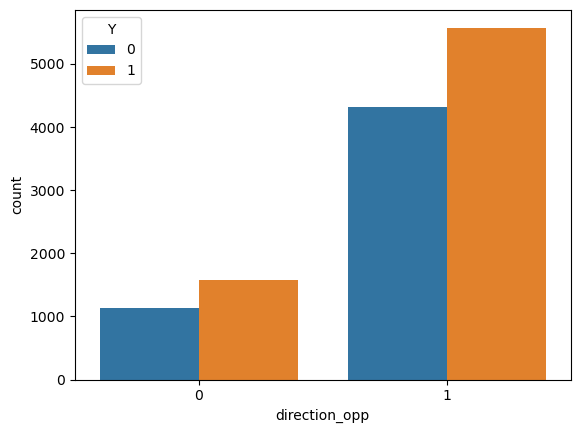

In [677]:

ax = sns.countplot(x='direction_opp', hue="Y", data=df1,palette = "tab10")
plt.show()

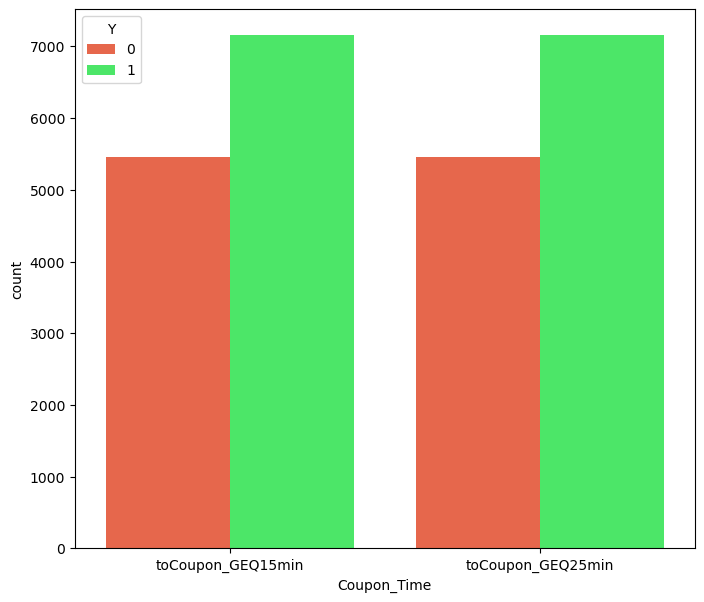

In [678]:
# Reshape DataFrame using melt()
df_melted = df1.melt(id_vars=['Y'], value_vars=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], 
                      var_name="Coupon_Time", value_name="Value")
custom_palette = ["#FF5733", "#33FF57"]  # Replace with your preferred colors
# Set Seaborn Style

# Plot
plt.figure(figsize=(8, 7))

ax = sns.countplot(x="Coupon_Time", hue="Y", data=df_melted, palette=custom_palette)

# Show Plot
plt.show()

In [679]:
df1.sample()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5220,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),1d,Male,31,Married partner,...,never,1~3,4~8,4~8,less1,1,0,0,1,0


In [680]:
df1.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

# ENCODING

In [682]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Convert Object (Categorical) Columns to Numeric
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = encoder.fit_transform(df1[col])

# Now All Columns Are Numeric
print(df1.dtypes)  # Check Again

destination             int32
passanger               int32
weather                 int32
temperature             int64
time                    int32
coupon                  int32
expiration              int32
gender                  int32
age                     int32
maritalStatus           int32
has_children            int64
education               int32
occupation              int32
income                  int32
Bar                     int32
CoffeeHouse             int32
CarryAway               int32
RestaurantLessThan20    int32
Restaurant20To50        int32
toCoupon_GEQ15min       int64
toCoupon_GEQ25min       int64
direction_same          int64
direction_opp           int64
Y                       int64
dtype: object


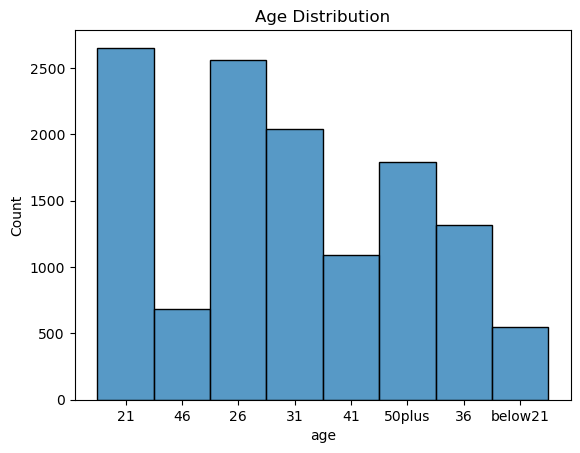

In [683]:

sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

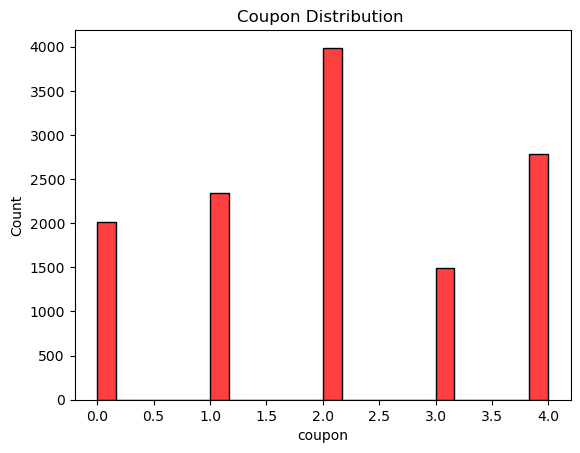

In [684]:
sns.histplot(df1['coupon'],color='red')
plt.title('Coupon Distribution ')
plt.show()



### correlation matrix and graph

In [686]:
df1.corr()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,1.000000,-0.114539,-0.080314,-0.032057,0.408021,-0.009177,-0.028068,0.007940,-0.001852,0.002746,...,-0.005714,-0.008007,-0.008638,0.003996,-0.001919,0.136935,0.185907,-0.080760,0.080760,-0.003648
passanger,-0.114539,1.000000,0.062401,0.058997,-0.398918,0.017802,0.073392,-0.021215,0.004671,-0.020375,...,0.015181,-0.008234,-0.017152,-0.031390,-0.029586,0.066521,-0.193054,-0.270560,0.270560,0.052028
weather,-0.080314,0.062401,1.000000,0.433714,-0.025656,0.148814,0.020585,-0.027035,-0.019196,-0.018578,...,0.010694,-0.006755,-0.038991,-0.003920,0.004629,-0.122124,-0.209158,0.017136,-0.017136,0.097122
temperature,-0.032057,0.058997,0.433714,1.000000,-0.063353,0.131240,0.127774,-0.025010,-0.027112,0.002405,...,0.009070,0.006672,-0.033422,-0.000097,0.000291,-0.157089,-0.227165,0.097972,-0.097972,0.059393
time,0.408021,-0.398918,-0.025656,-0.063353,1.000000,0.049971,-0.081604,-0.003386,-0.008422,0.004648,...,-0.005020,-0.005067,0.000776,-0.003201,0.008523,0.003963,0.284532,0.314473,-0.314473,-0.048846
coupon,-0.009177,0.017802,0.148814,0.131240,0.049971,1.000000,0.147022,0.007158,0.002654,-0.000131,...,-0.007215,-0.002370,-0.003085,0.011128,0.005838,-0.129636,-0.108868,-0.074621,0.074621,0.099183
expiration,-0.028068,0.073392,0.020585,0.127774,-0.081604,0.147022,1.000000,-0.001898,0.006406,-0.012134,...,-0.008309,-0.012307,-0.003345,-0.010822,0.000543,0.045644,-0.025562,0.032028,-0.032028,-0.128737
gender,0.007940,-0.021215,-0.027035,-0.025010,-0.003386,0.007158,-0.001898,1.000000,-0.062229,0.057875,...,-0.155558,0.063037,-0.014574,0.042880,0.002441,-0.006614,0.004720,-0.004881,0.004881,0.043740
age,-0.001852,0.004671,-0.019196,-0.027112,-0.008422,0.002654,0.006406,-0.062229,1.000000,-0.176614,...,0.206444,0.000895,0.090785,-0.030740,0.000892,0.026566,0.000210,-0.008341,0.008341,-0.036429
maritalStatus,0.002746,-0.020375,-0.018578,0.002405,0.004648,-0.000131,-0.012134,0.057875,-0.176614,1.000000,...,-0.091115,0.010954,-0.024884,0.000105,0.044103,-0.049546,0.004720,0.016577,-0.016577,0.025303


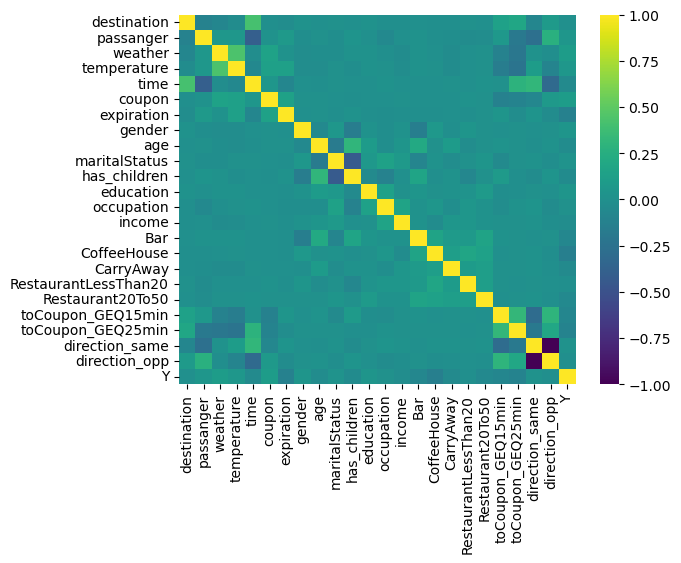

In [688]:

sns.heatmap(df1.corr(),cmap="viridis")
plt.show()

In [689]:
#input and output separate from dataset
#separate input
X= df1.iloc[:,:-1]

In [690]:
X.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,55,2,4,0,0,0,3,...,3,4,4,0,1,0,0,0,0,1
1,1,1,2,80,0,2,1,0,0,3,...,3,4,4,0,1,0,0,0,0,1
2,1,1,2,80,0,1,1,0,0,3,...,3,4,4,0,1,0,1,0,0,1
3,1,1,2,80,2,2,1,0,0,3,...,3,4,4,0,1,0,1,0,0,1
4,1,1,2,80,2,2,0,0,0,3,...,3,4,4,0,1,0,1,0,0,1


In [691]:
#out put
y = df1.iloc[:,-1]

In [692]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Y, dtype: int64

In [693]:
#given data converted into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Standardization

In [695]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Creation

### LogisticRegression model

In [698]:
#create object of logisticregression
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [699]:
y_pred_lr=logmodel.predict(X_test)

In [700]:
lr_score= accuracy_score(y_test, y_pred_lr)*100
lr_score

62.92624900872323

In [701]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52      1106
           1       0.64      0.76      0.70      1416

    accuracy                           0.63      2522
   macro avg       0.62      0.61      0.61      2522
weighted avg       0.62      0.63      0.62      2522



### DicisionTree Classifier

In [703]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [704]:
y_pred_dt = dt.predict(X_test)

In [705]:
dt_score = accuracy_score(y_test,y_pred_dt)*100
dt_score

68.79460745440127

In [706]:


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6879460745440127
              precision    recall  f1-score   support

           0       0.68      0.54      0.60      1106
           1       0.69      0.81      0.74      1416

    accuracy                           0.69      2522
   macro avg       0.69      0.67      0.67      2522
weighted avg       0.69      0.69      0.68      2522



### RandomForest Classifier

In [708]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [709]:
y_pred_rf = rf.predict(X_test)

In [710]:
rf_score = accuracy_score(y_test,y_pred_rf)*100
rf_score

72.68041237113401

In [711]:


print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7268041237113402
              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1106
           1       0.74      0.80      0.77      1416

    accuracy                           0.73      2522
   macro avg       0.72      0.72      0.72      2522
weighted avg       0.73      0.73      0.72      2522



### K-Nearest neighbor

In [713]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [714]:
y_pred_knn = knn.predict(X_test)


In [715]:
knn_score = accuracy_score(y_test,y_pred_knn)*100
knn_score

64.19508326724822

In [716]:

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6419508326724822
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      1106
           1       0.68      0.69      0.68      1416

    accuracy                           0.64      2522
   macro avg       0.64      0.64      0.64      2522
weighted avg       0.64      0.64      0.64      2522



### SupportVector Classifier 

In [718]:
svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [719]:
y_pred_svm = svm.predict(X_test)


In [720]:
svm_score = accuracy_score(y_test,y_pred_svm)*100
svm_score

68.16019032513879

In [721]:

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6816019032513878
              precision    recall  f1-score   support

           0       0.67      0.55      0.60      1106
           1       0.69      0.78      0.73      1416

    accuracy                           0.68      2522
   macro avg       0.68      0.67      0.67      2522
weighted avg       0.68      0.68      0.68      2522



In [722]:
# Example results in a DataFrame
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression','Dicision tree' , 'Random Forest', 'KNN', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_svm)],
    'F1-Score': [f1_score(y_test, y_pred_lr),f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_svm)]
})

print(model_comparison)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.629262   0.643070  0.763418  0.698095
1        Dicision tree  0.687946   0.689801  0.807203  0.743898
2        Random Forest  0.726804   0.738048  0.795904  0.765885
3                  KNN  0.641951   0.679245  0.686441  0.682824
4                  SVM  0.681602   0.690966  0.783192  0.734194


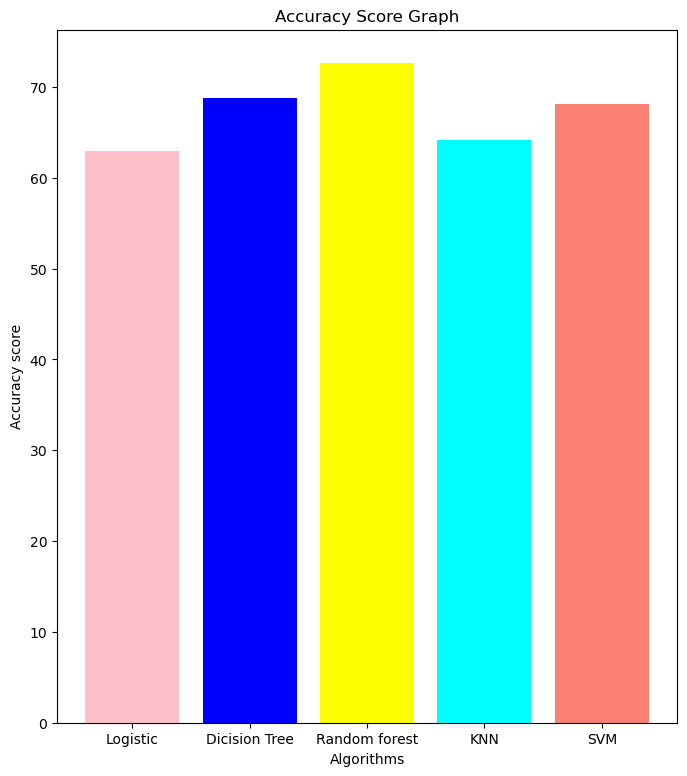

In [723]:
plt.figure(figsize=(8,9))
colors=['pink','blue','yellow','cyan','salmon']
plt.bar(['Logistic','Dicision Tree','Random forest','KNN','SVM'],[lr_score,dt_score,rf_score,knn_score,svm_score],color=colors)
plt.title("Accuracy Score Graph")
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score')
plt.show()